In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from AGN_plot import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


## Default Model

In [79]:
def plot_default(spe,
                 div=None,
                 d=4,
                 stop=True,
                 ax=None,
                 color=None,
                 label=None,
                 Range=[1e0, 2e7],
                 Dt=True):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))

    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)
    Abu1.plot(ax=ax, spe=spe, label='X-ray', color=color, Dt=Dt, linewidth=3)
    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                  fontsize=25)
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(ax=ax,
                  spe=spe,
                  color=color,
                  linestyle='--',
                  label='X-ray removed',
                  Dt=Dt,
                  linewidth=3)

    raw = np.loadtxt('./data/2dis_inf')

    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    if Dt:
        t = raw[:, 0] - 1e6
        ax.set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
    else:
        t = raw[:, 0]
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_xlim(Range)

In [80]:
#Embed 
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


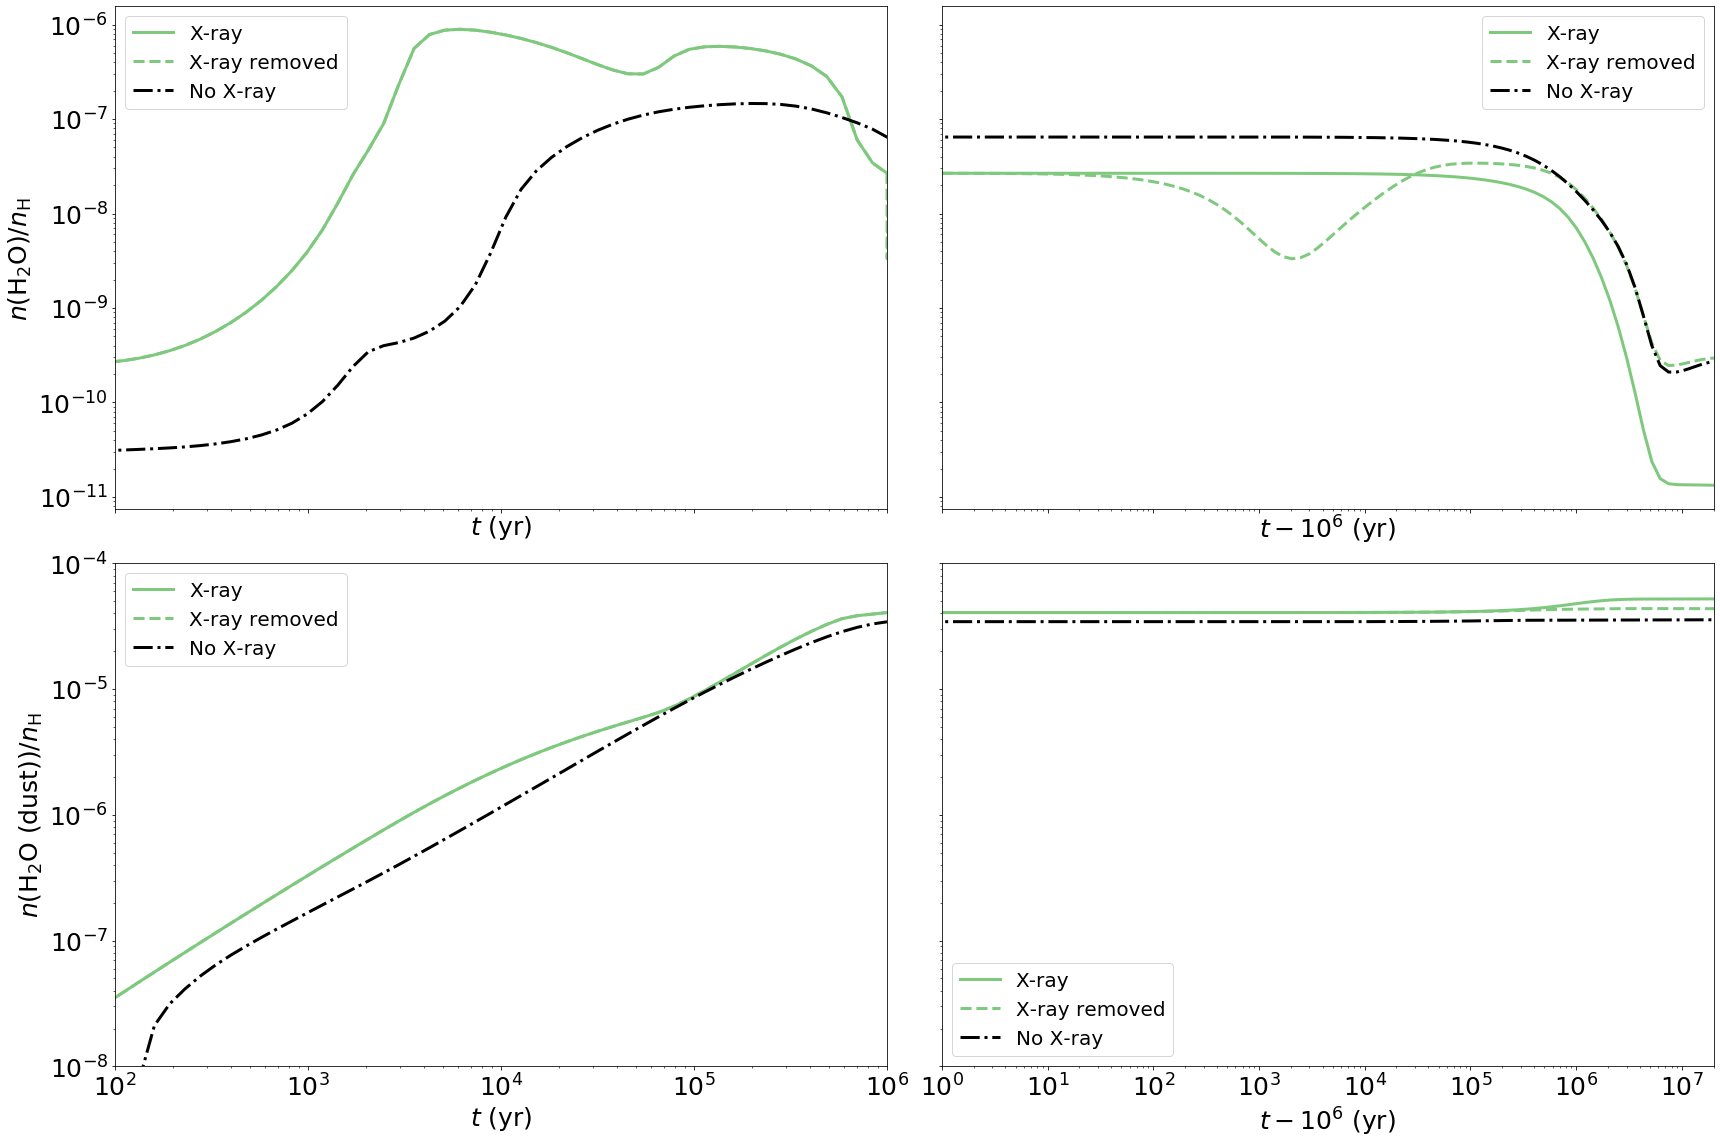

In [96]:
f, ax = plt.subplots(2, 2, figsize=(24, 16), sharex='col', sharey='row')
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H2O', ax=ax[0], color=c_default[0], Range=[1e2, 1e6], Dt=False)
plot_default('H2O', ax=ax[1], color=c_default[0])

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[2],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')),
             Range=[1e2, 1e6],
             Dt=False)

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[3],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')))
ax[1].set_ylabel('')
ax[3].set_ylabel('')
ax[2].set_ylim([1e-8, 1e-4])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/default_c.eps')

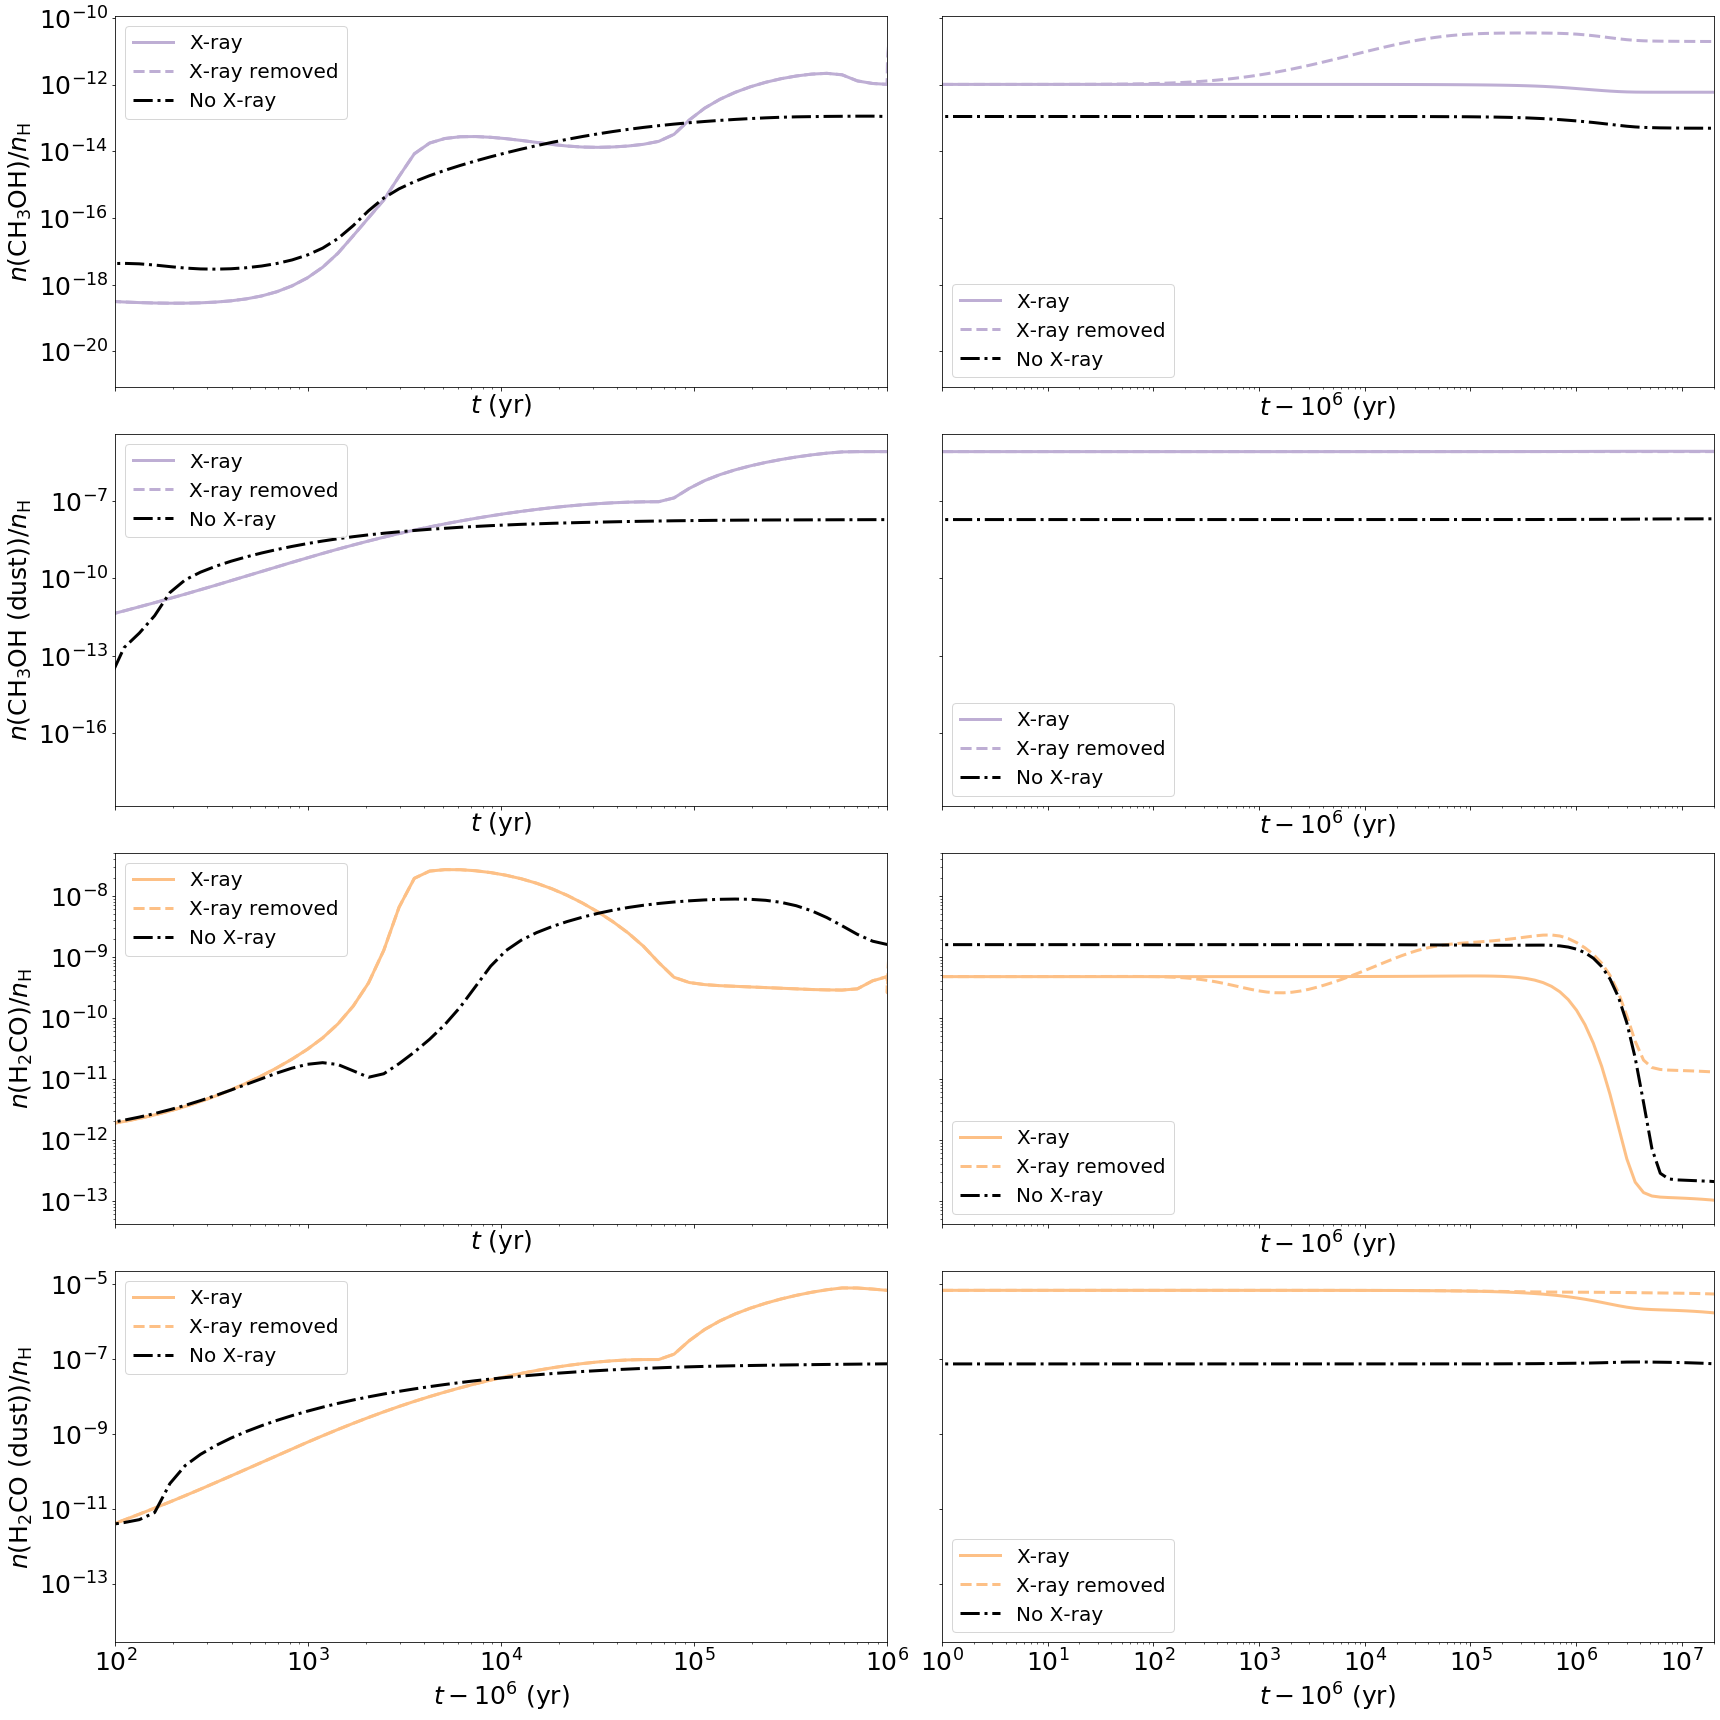

In [94]:
f, ax = plt.subplots(4, 2, figsize=(24, 24), sharex='col', sharey='row')
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('CH3OH', ax=ax[0], color=c_default[1], Range=[1e2, 1e6], Dt=False)
plot_default('CH3OH', ax=ax[1], color=c_default[1])

plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
             ax=ax[2],
             color=c_default[1],
             label=r'${}$ (dust)'.format(latex_name('CH3OH')), Range=[1e2, 1e6], Dt=False)
plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
             ax=ax[3],
             color=c_default[1],
             label=r'${}$ (dust)'.format(latex_name('CH3OH')))

plot_default('H2CO', ax=ax[4], color=c_default[2], Range=[1e2, 1e6], Dt=False)
plot_default('H2CO', ax=ax[5], color=c_default[2])

plot_default('H_DUSTH_DUSTC_DUSTO_DUST',
             ax=ax[6],
             color=c_default[2],
             label=r'${}$ (dust)'.format(latex_name('H2CO')), Range=[1e2, 1e6], Dt=False)
plot_default('H_DUSTH_DUSTC_DUSTO_DUST',
             ax=ax[7],
             color=c_default[2],
             label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[6].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[7].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-14, 4e-10])
#ax[1].set_ylim([1e-8, 1e-4])
#ax[2].set_ylim([5e-14, 5e-8])
#ax[3].set_ylim([5e-8, 5e-5])
for a in ax[1::2]:
    a.set_ylabel('')
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/otherprebiotic_c.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

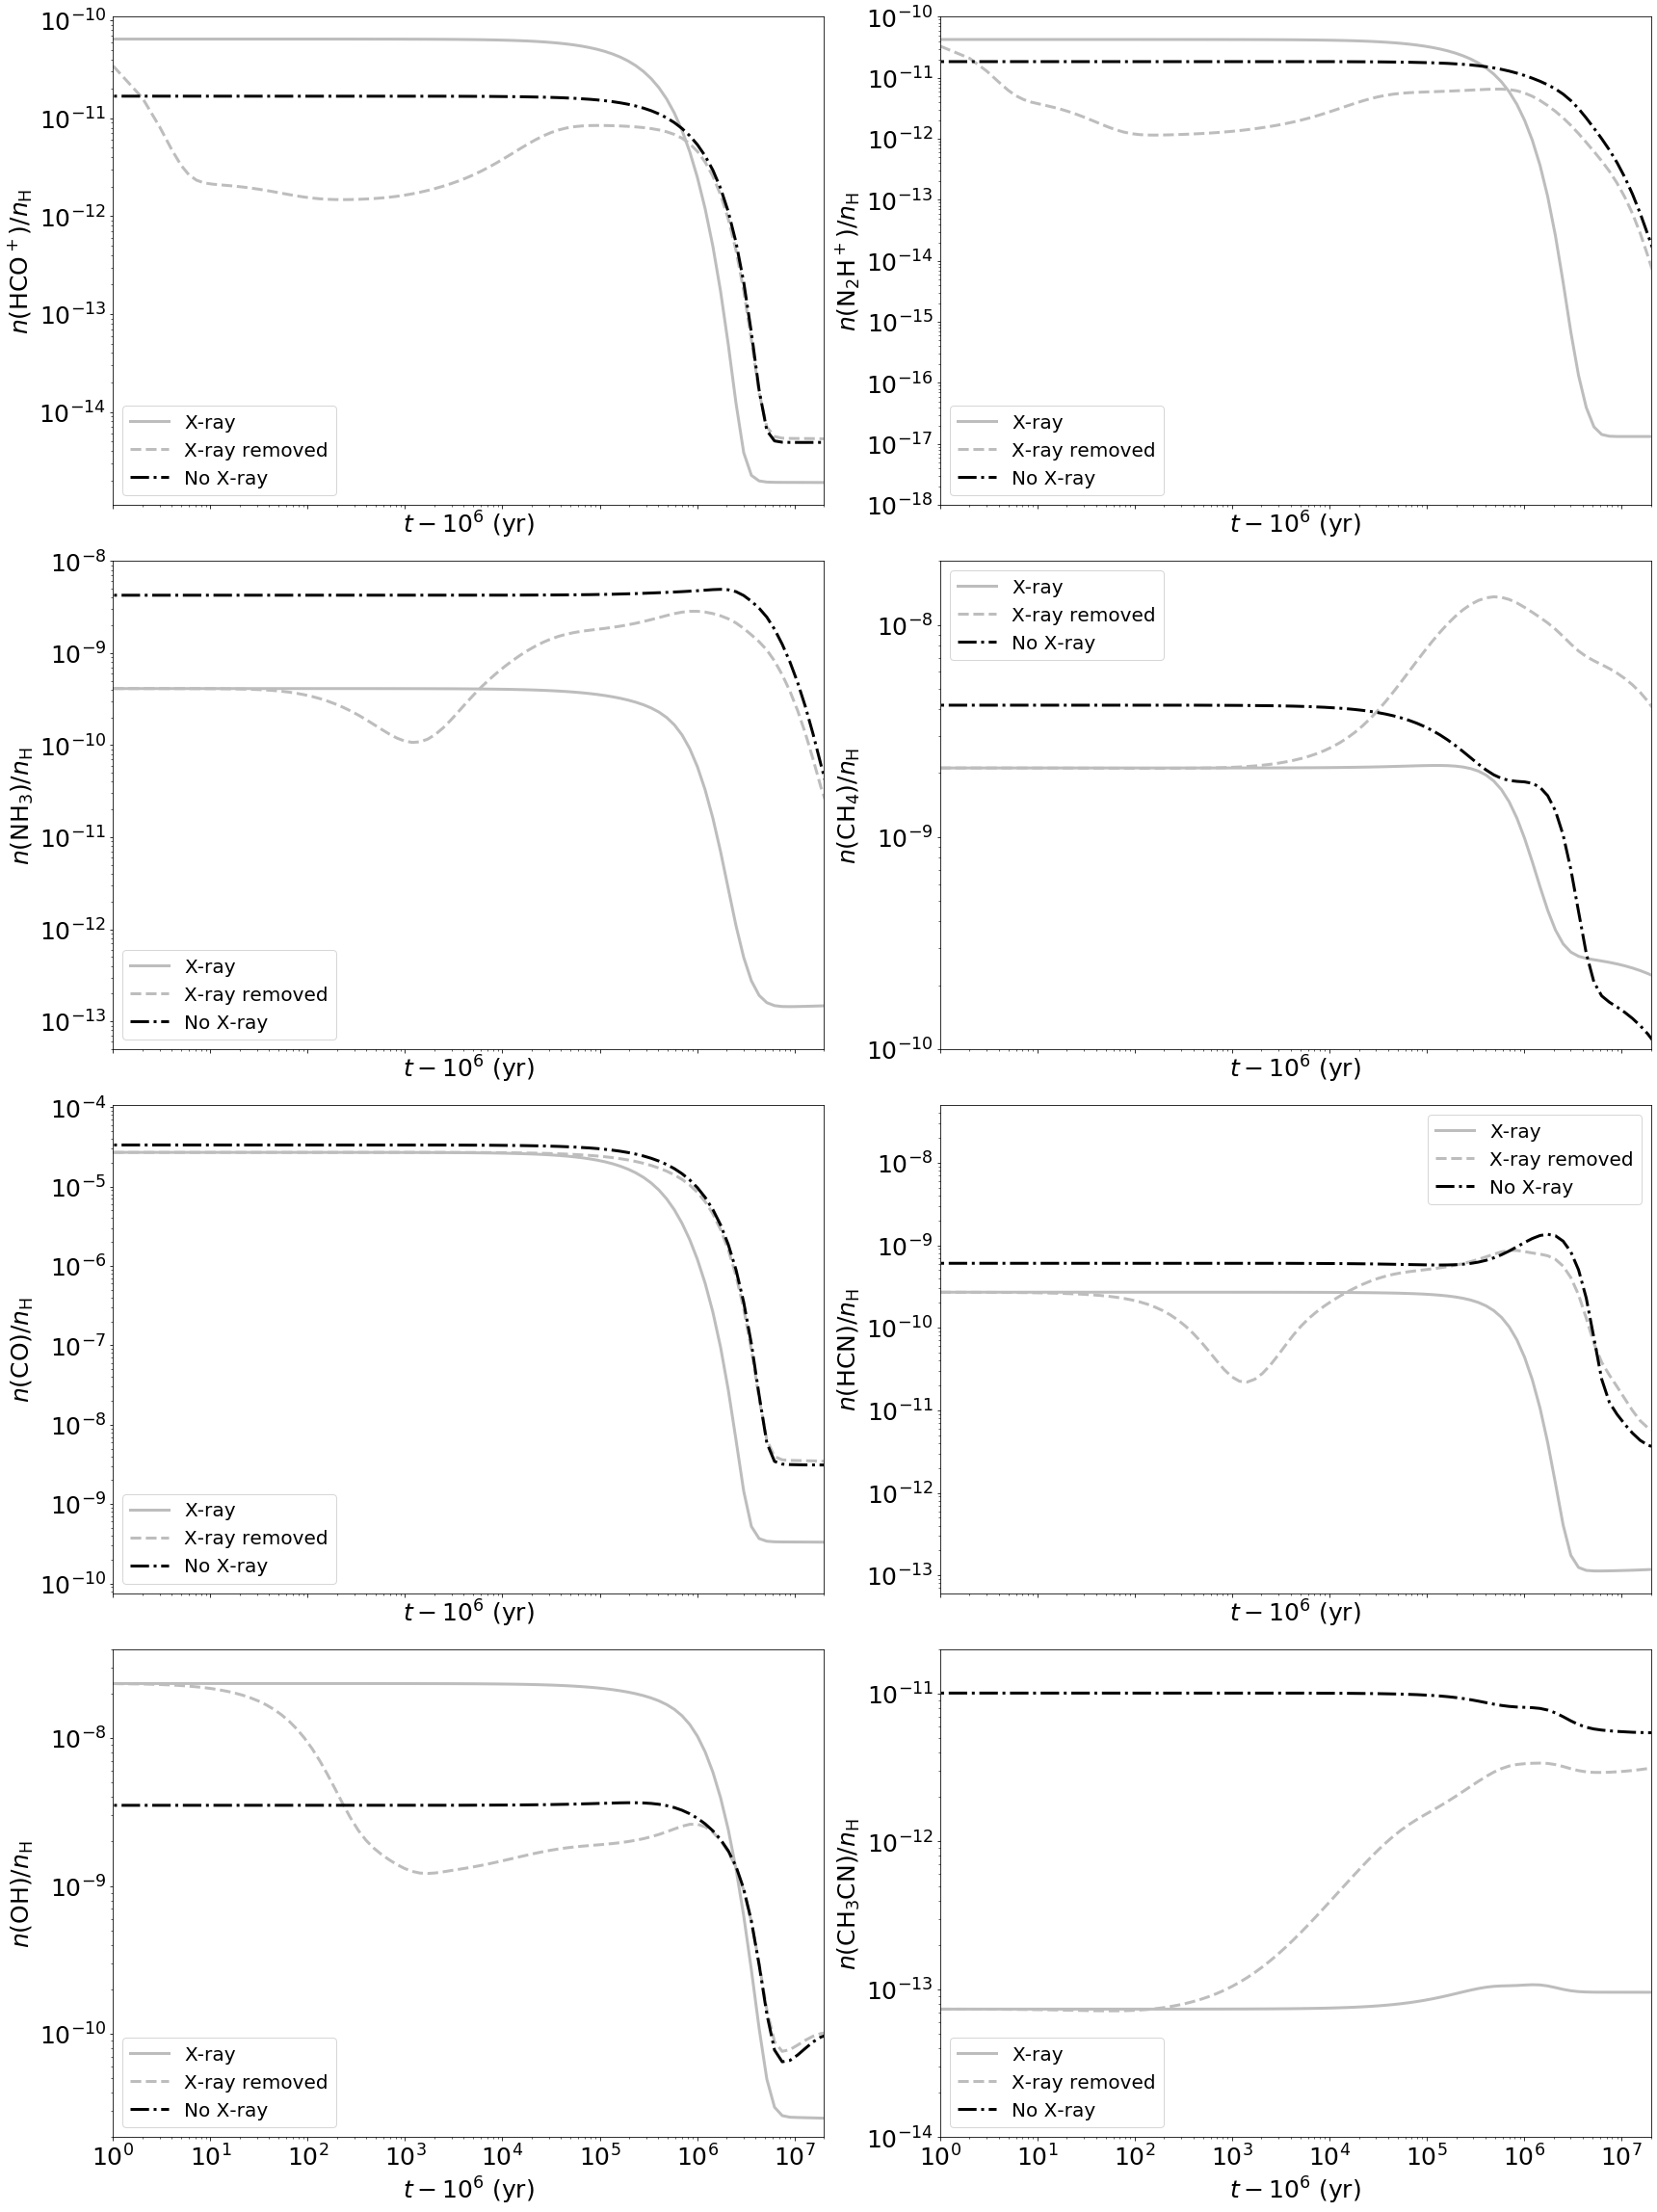

In [83]:
f, ax = plt.subplots(4, 2, figsize=(24, 32), sharex=True)
ax = ax.flatten()

plot_default('HCOj', ax=ax[0], color='#bdbdbd')

plot_default('N2Hj', ax=ax[1], color='#bdbdbd')

plot_default('NH3', ax=ax[2], color='#bdbdbd')

plot_default('CH4', ax=ax[3], color='#bdbdbd')

plot_default('CO', ax=ax[4], color='#bdbdbd')

plot_default('HCN', ax=ax[5], color='#bdbdbd')

plot_default('OH', ax=ax[6], color='#bdbdbd')

plot_default('CH3CN', ax=ax[7], color='#bdbdbd')

ax[6].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[7].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)

ax[1].set_ylim([1e-18, 1e-10])
ax[2].set_ylim([5e-14, 1e-8])
ax[3].set_ylim([1e-10, 2e-8])
ax[6].set_ylim([2e-11, 4e-8])
ax[7].set_ylim([1e-14, 2e-11])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/appendix_g_c.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

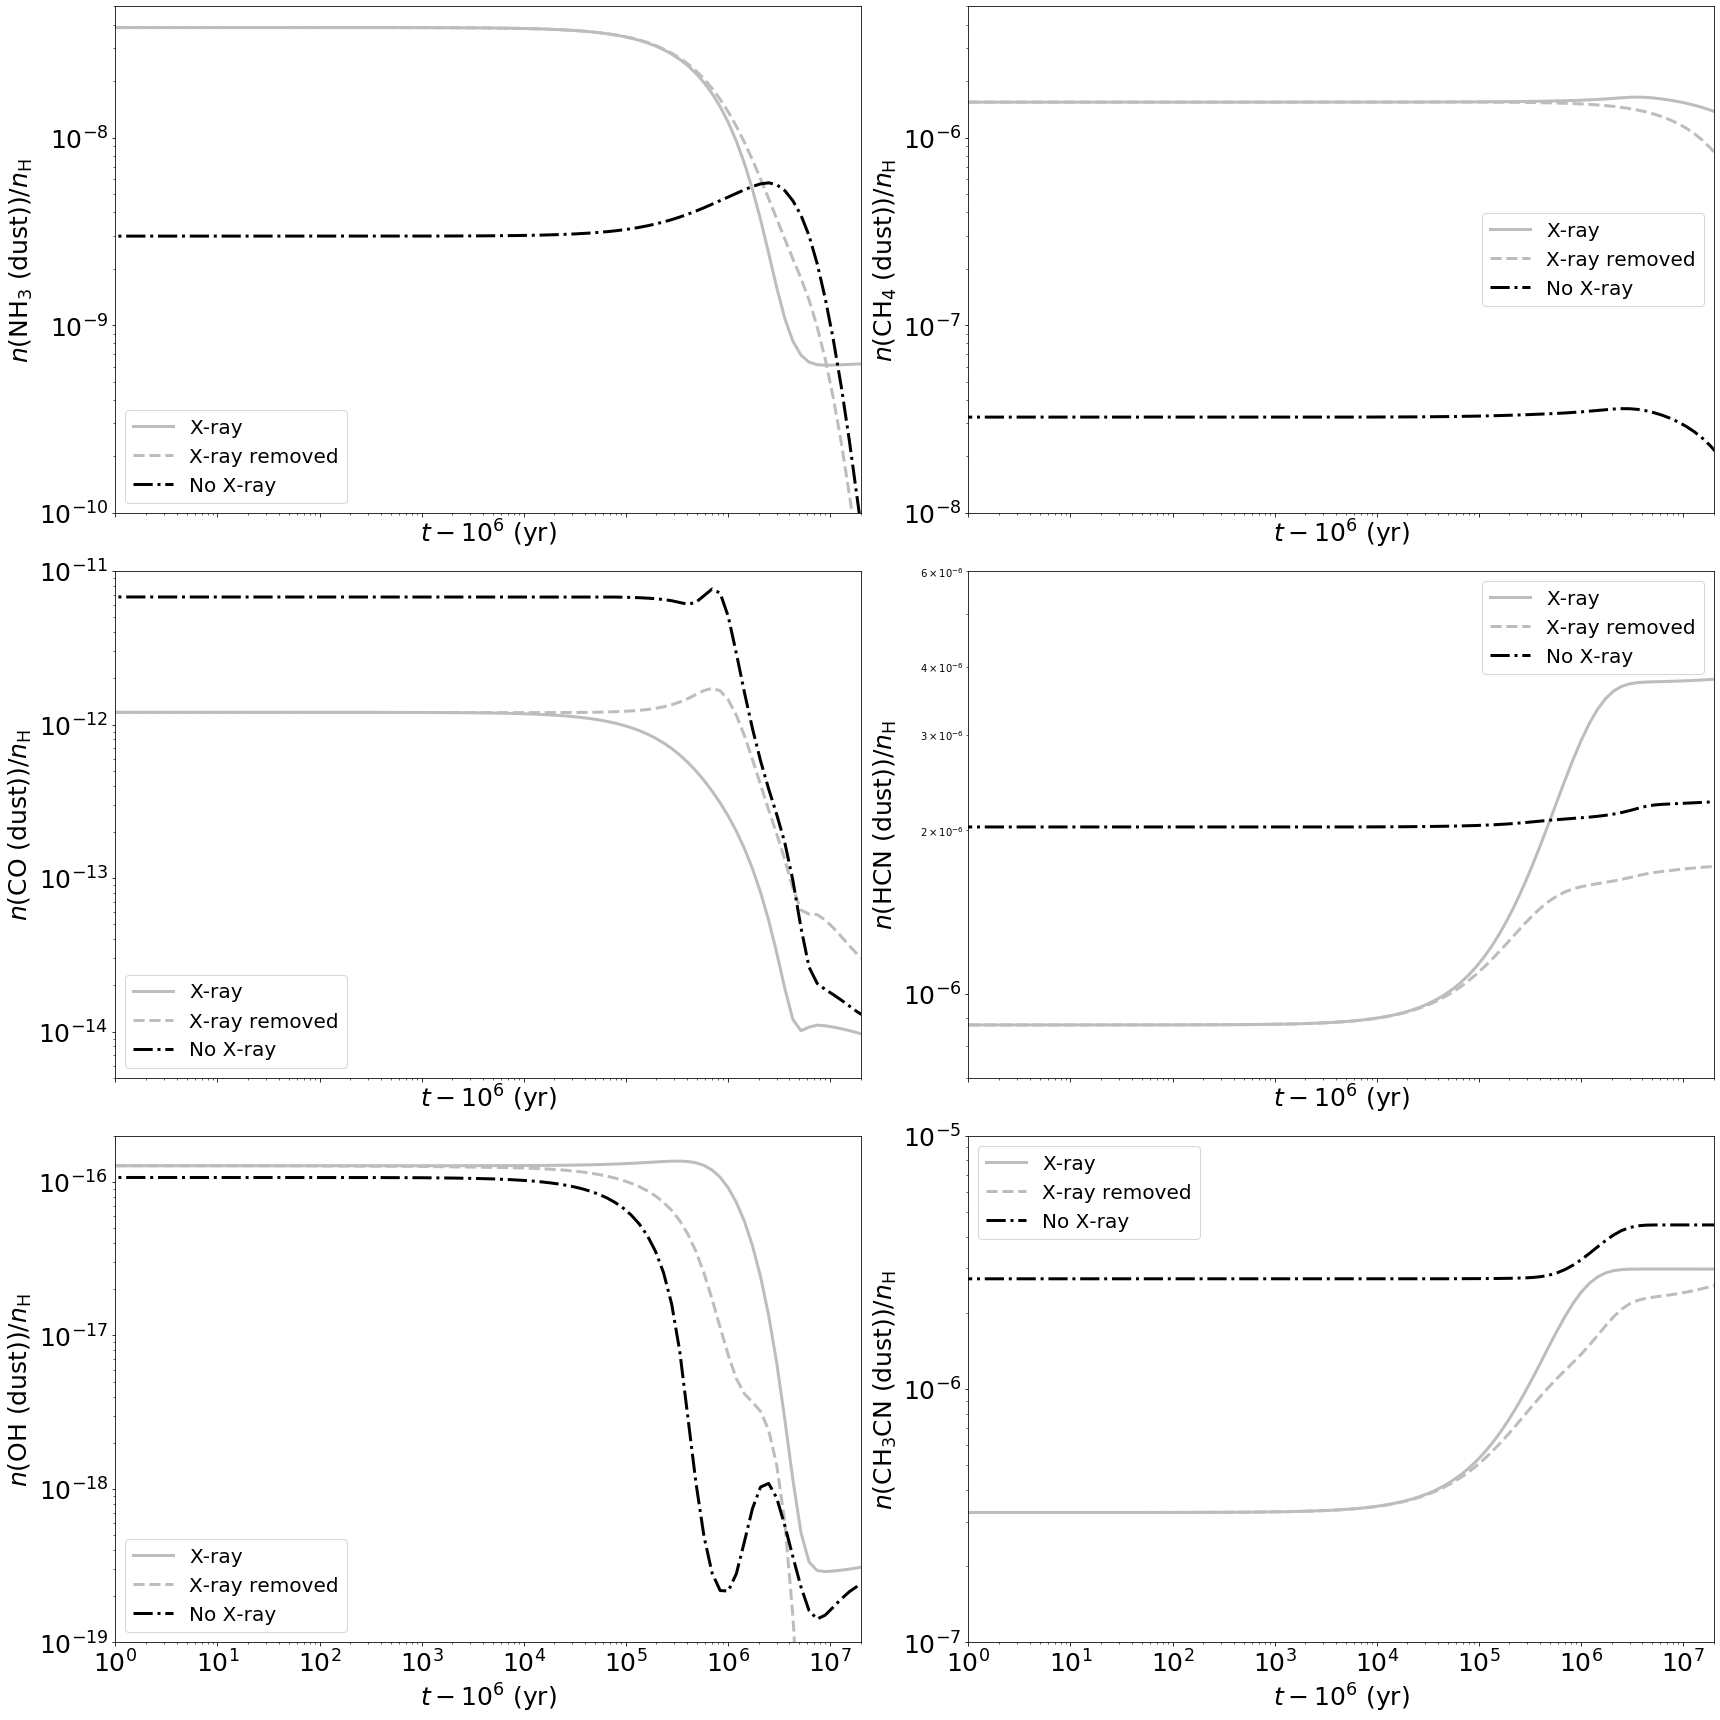

In [84]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()

plot_default('N_DUSTH_DUSTH_DUSTH_DUST',
             ax=ax[0],
             color='#bdbdbd',
             label=r'${}$ (dust)'.format(latex_name('NH3')))

plot_default('C_DUSTH_DUSTH_DUSTH_DUSTH_DUST',
             ax=ax[1],
             color='#bdbdbd',
             label=r'${}$ (dust)'.format(latex_name('CH4')))

plot_default('C_DUSTO_DUST',
             ax=ax[2],
             color='#bdbdbd',
             label=r'${}$ (dust)'.format(latex_name('CO')))

plot_default('H_DUSTC_DUSTN_DUST',
             ax=ax[3],
             color='#bdbdbd',
             label=r'${}$ (dust)'.format(latex_name('HCN')))

plot_default('O_DUSTH_DUST',
             ax=ax[4],
             color='#bdbdbd',
             label=r'${}$ (dust)'.format(latex_name('OH')))

plot_default('C_DUSTH_DUSTH_DUSTH_DUSTC_DUSTN_DUST',
             ax=ax[5],
             color='#bdbdbd',
             label=r'${}$ (dust)'.format(latex_name('CH3CN')))

ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[0].set_ylim([1e-10, 5e-8])
ax[1].set_ylim([1e-8, 5e-6])
ax[2].set_ylim([5e-15, 1e-11])
ax[3].set_ylim([7e-7, 6e-6])
ax[4].set_ylim([1e-19, 2e-16])
ax[5].set_ylim([1e-7, 1e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/appendix_d_c.eps')

## Galactic Distribution

In [85]:
def plot_dis(spe, div=None, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    for i, d in enumerate([1, 2, 4, 8]):
        j = str(d)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)

        Abu1.plot(ax=ax,
                  spe=spe,
                  label='{} kpc'.format(d),
                  color=color[i],
                  linewidth=3)
        ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                      fontsize=25)
        ax.set_xlim([1e0, 2e7])
        if stop:
            j = '0' + str(d)
            Abu0 = Abu(j)
            if div != None:
                Abu.Div(div)
            Abu0.plot(ax=ax,
                      spe=spe,
                      color=color[i],
                      linestyle='--',
                      label=None,
                      linewidth=3)

    raw = np.loadtxt('./data/2dis_inf')
    t = raw[:, 0] - 1e6
    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(loc=0, prop={'size': 20})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

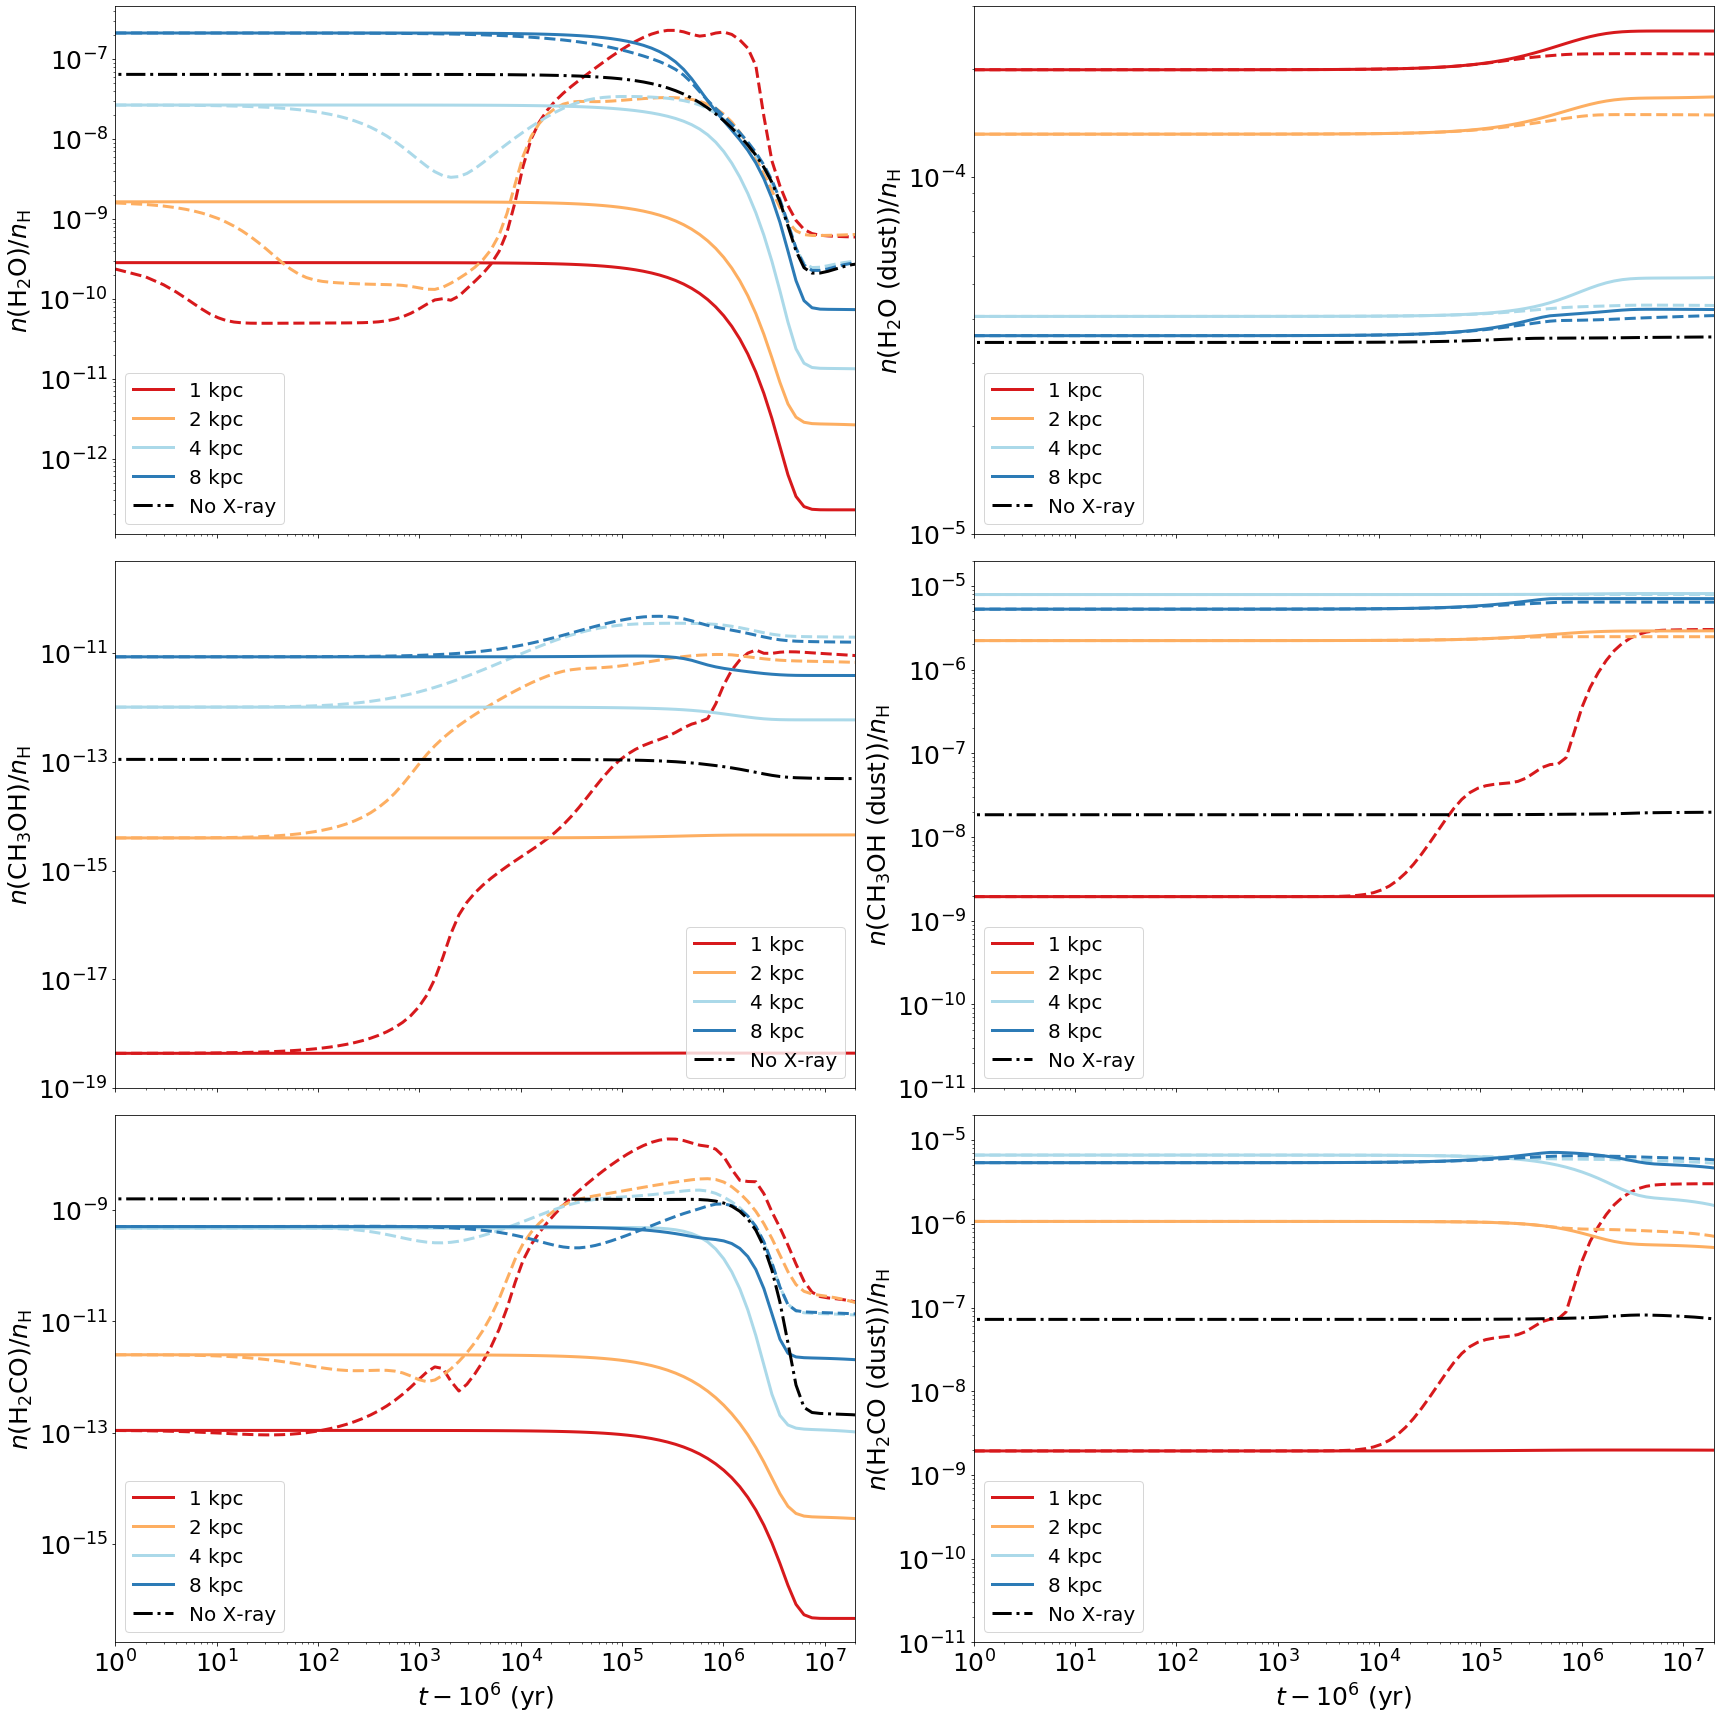

In [86]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_dis = ['#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']

plot_dis('H2O', ax=ax[0], color=c_dis)
plot_dis('CH3OH', ax=ax[2], color=c_dis)
plot_dis('H2CO', ax=ax[4], color=c_dis)

plot_dis('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_dis('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_dis('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-10, 1e-9])
ax[1].set_ylim([1e-5, 3e-4])
ax[2].set_ylim([1e-19, 5e-10])
ax[3].set_ylim([1e-11, 2e-5])
#ax[4].set_ylim([1e-12, 1e-10])
ax[5].set_ylim([1e-11, 2e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/galactic_distribution_c.eps')

## Different depths inside a molecular cloud

In [87]:
def plot_col(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)

    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                  fontsize=25)
    ax.set_xlim([1e0, 2e7])
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot_l(ax=ax, spe=spe, color=color, Nolabel=False, linewidth=3)
        Abu0.plot(ax=ax,
                  spe=spe,
                  color=color,
                  linestyle='--',
                  label=r'$N_{\mathrm{H}}=10^{22.5}$ cm$^{-2}$',
                  linewidth=3)
        Abu0.plot_u(ax=ax, spe=spe, color=color, Nolabel=False, linewidth=3)

    Abu_inf = Abu('_inf')
    Abu_inf.plot_l(ax=ax,
                   spe=spe,
                   color='black',
                   Nolabel=False,
                   NoX=True,
                   linewidth=3)
    Abu_inf.plot(ax=ax,
                 spe=spe,
                 label=r'No X-ray, $N_{\mathrm{H}}=10^{22.5}$ cm$^{-2}$',
                 color='black',
                 linestyle='--',
                 linewidth=3)
    Abu_inf.plot_u(ax=ax,
                   spe=spe,
                   color='black',
                   Nolabel=False,
                   NoX=True,
                   linewidth=3)
    ax.legend(loc=0, prop={'size': 15})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

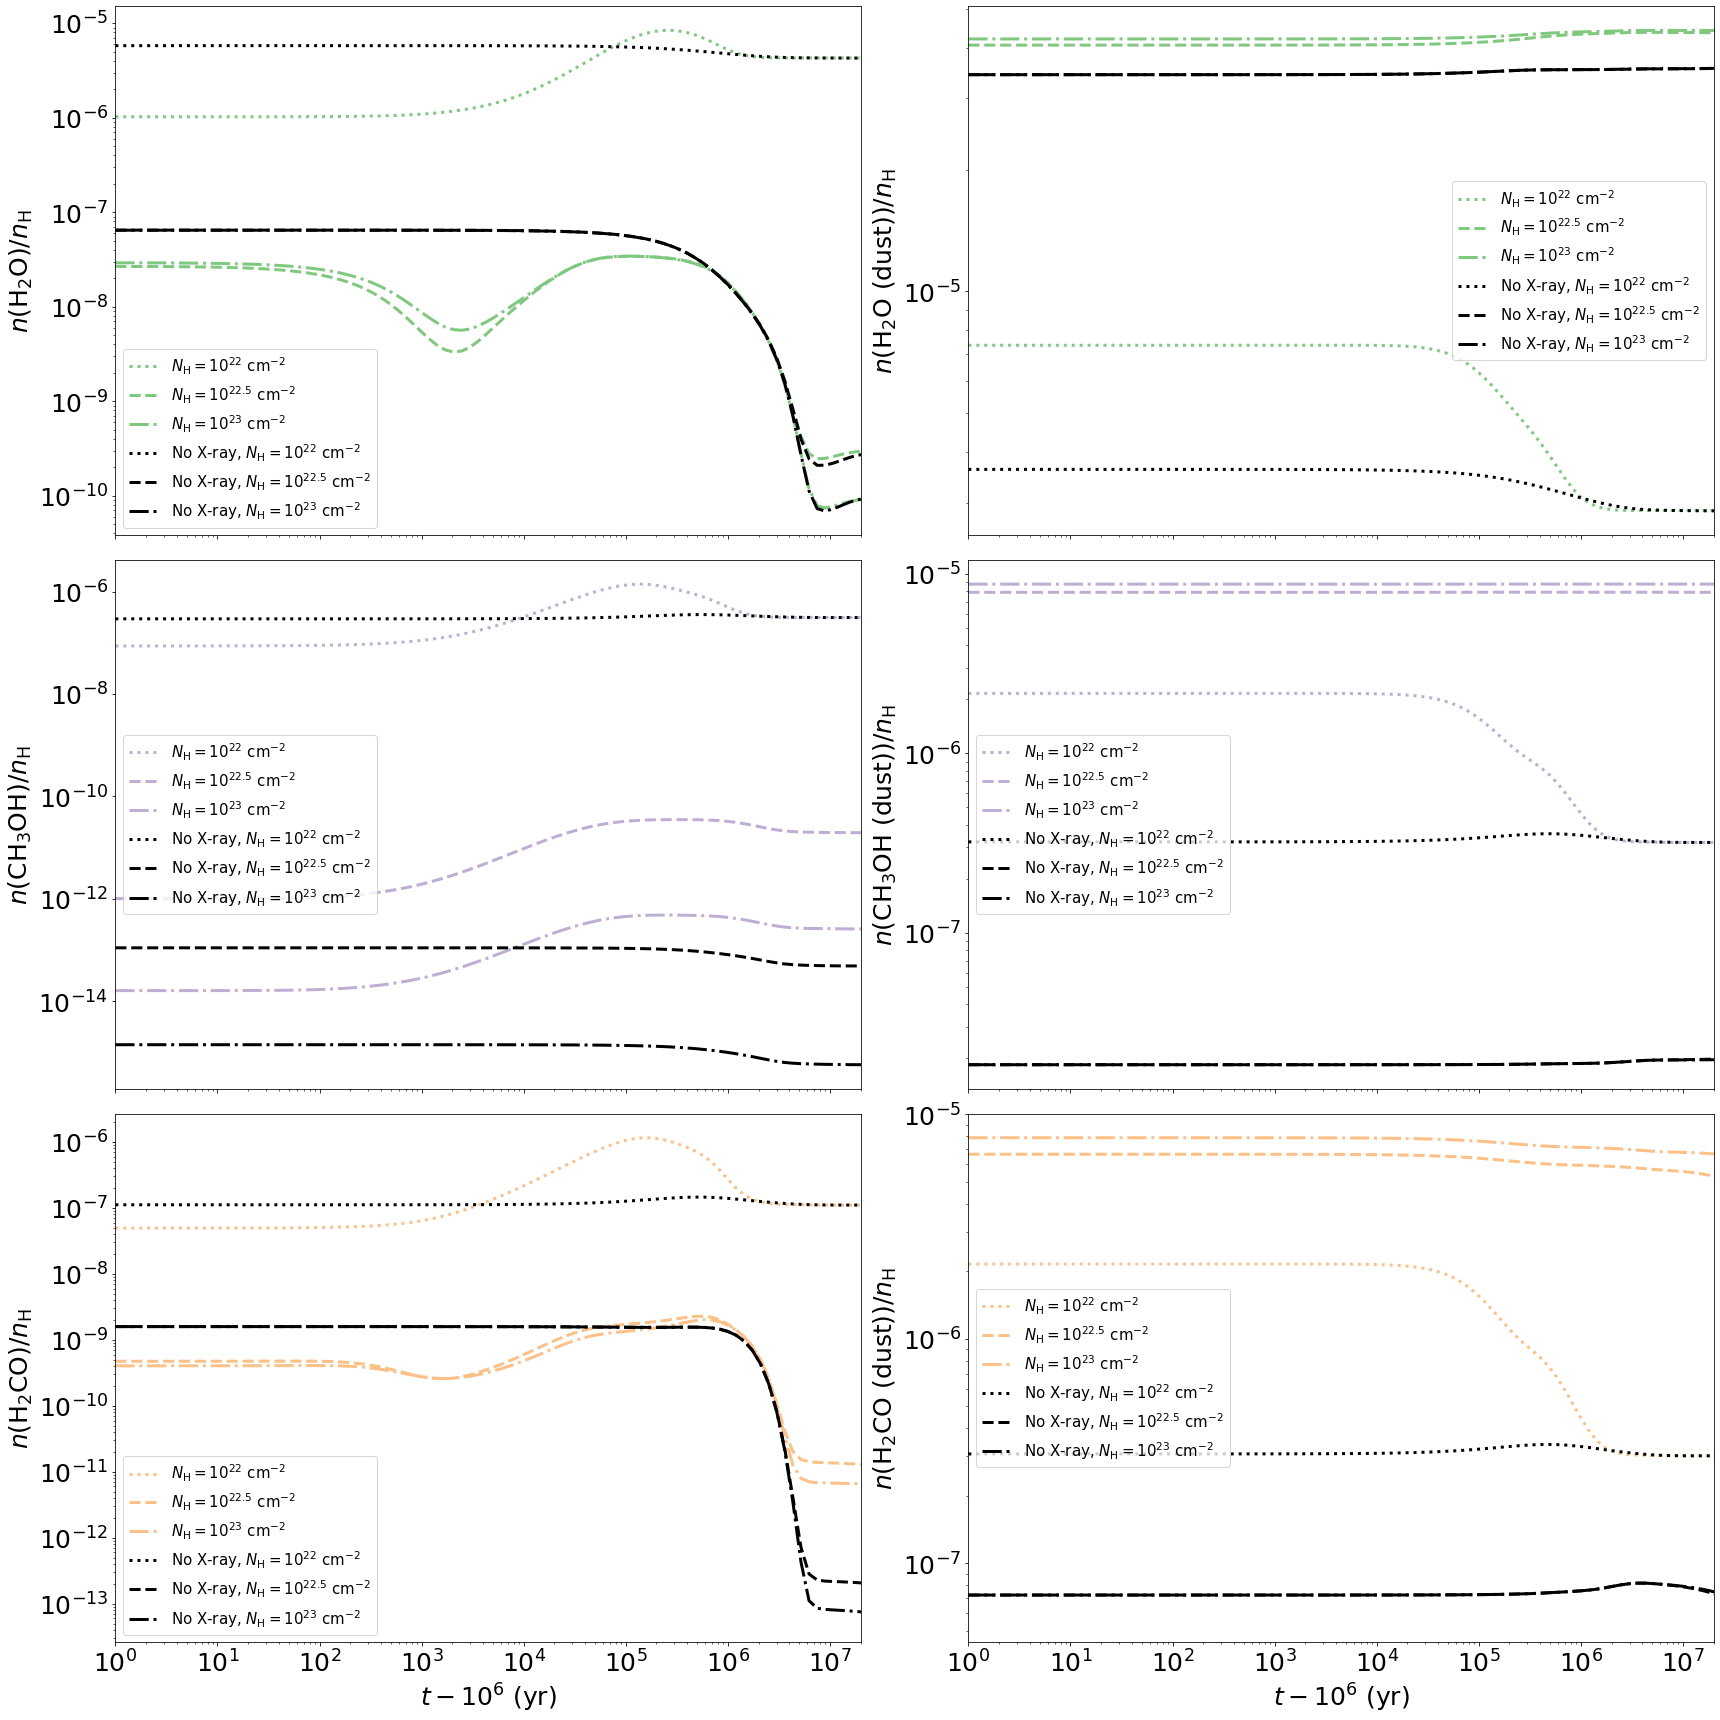

In [98]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_col('H2O', ax=ax[0], color=c_default[0])
plot_col('CH3OH', ax=ax[2], color=c_default[1])
plot_col('H2CO', ax=ax[4], color=c_default[2])

plot_col('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_default[0],
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_col('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_default[1],
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_col('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_default[2],
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([3e-12, 3e-5])
#ax[1].set_ylim([1e-7, 2e-4])
#ax[2].set_ylim([1e-23, 2e-5])
#ax[3].set_ylim([5e-11, 2e-5])
#ax[4].set_ylim([1e-14, 8e-6])
#ax[5].set_ylim([5e-10, 2e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/column_density_c.eps')

## Age of Molecular Clouds

In [104]:
def plot_age(
        spe,
        div=None,
        Age={
            #'': 0,
            #'1e+04': '$10^4$ yr',
            '1e+07': '$10^7$ yr'
        },
        ax=None,
        color=None,
        label=None,
        Range=[1e0, 2e7],
        Dt=True):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    for i, age in enumerate(Age.keys()):
        j = '4{}'.format(age)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)
        Abu1.plot(ax=ax,
                  spe=spe,
                  label='X-ray, Age = {}'.format(Age[age]),
                  color=color,
                  linewidth=3,
                  Dt=Dt)
        ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                      fontsize=25)
        ax.set_xlim(Range)
        j = '04{}'.format(age)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(ax=ax,
                  spe=spe,
                  color=color,
                  linestyle='--',
                  label='X-ray removed, Age = {}'.format(Age[age]),
                  linewidth=3,
                  Dt=Dt)

        raw = np.loadtxt('./data/2dis_inf{}'.format(age))
        if Dt:
            t = raw[:, 0] - 1e6
        else:
            t = raw[:, 0]
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t,
                  abu,
                  label='No X-ray, Age = {}'.format(Age[age]),
                  color='black',
                  linestyle='-.',
                  linewidth=3)
        ax.legend(loc=0, prop={'size': 20})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

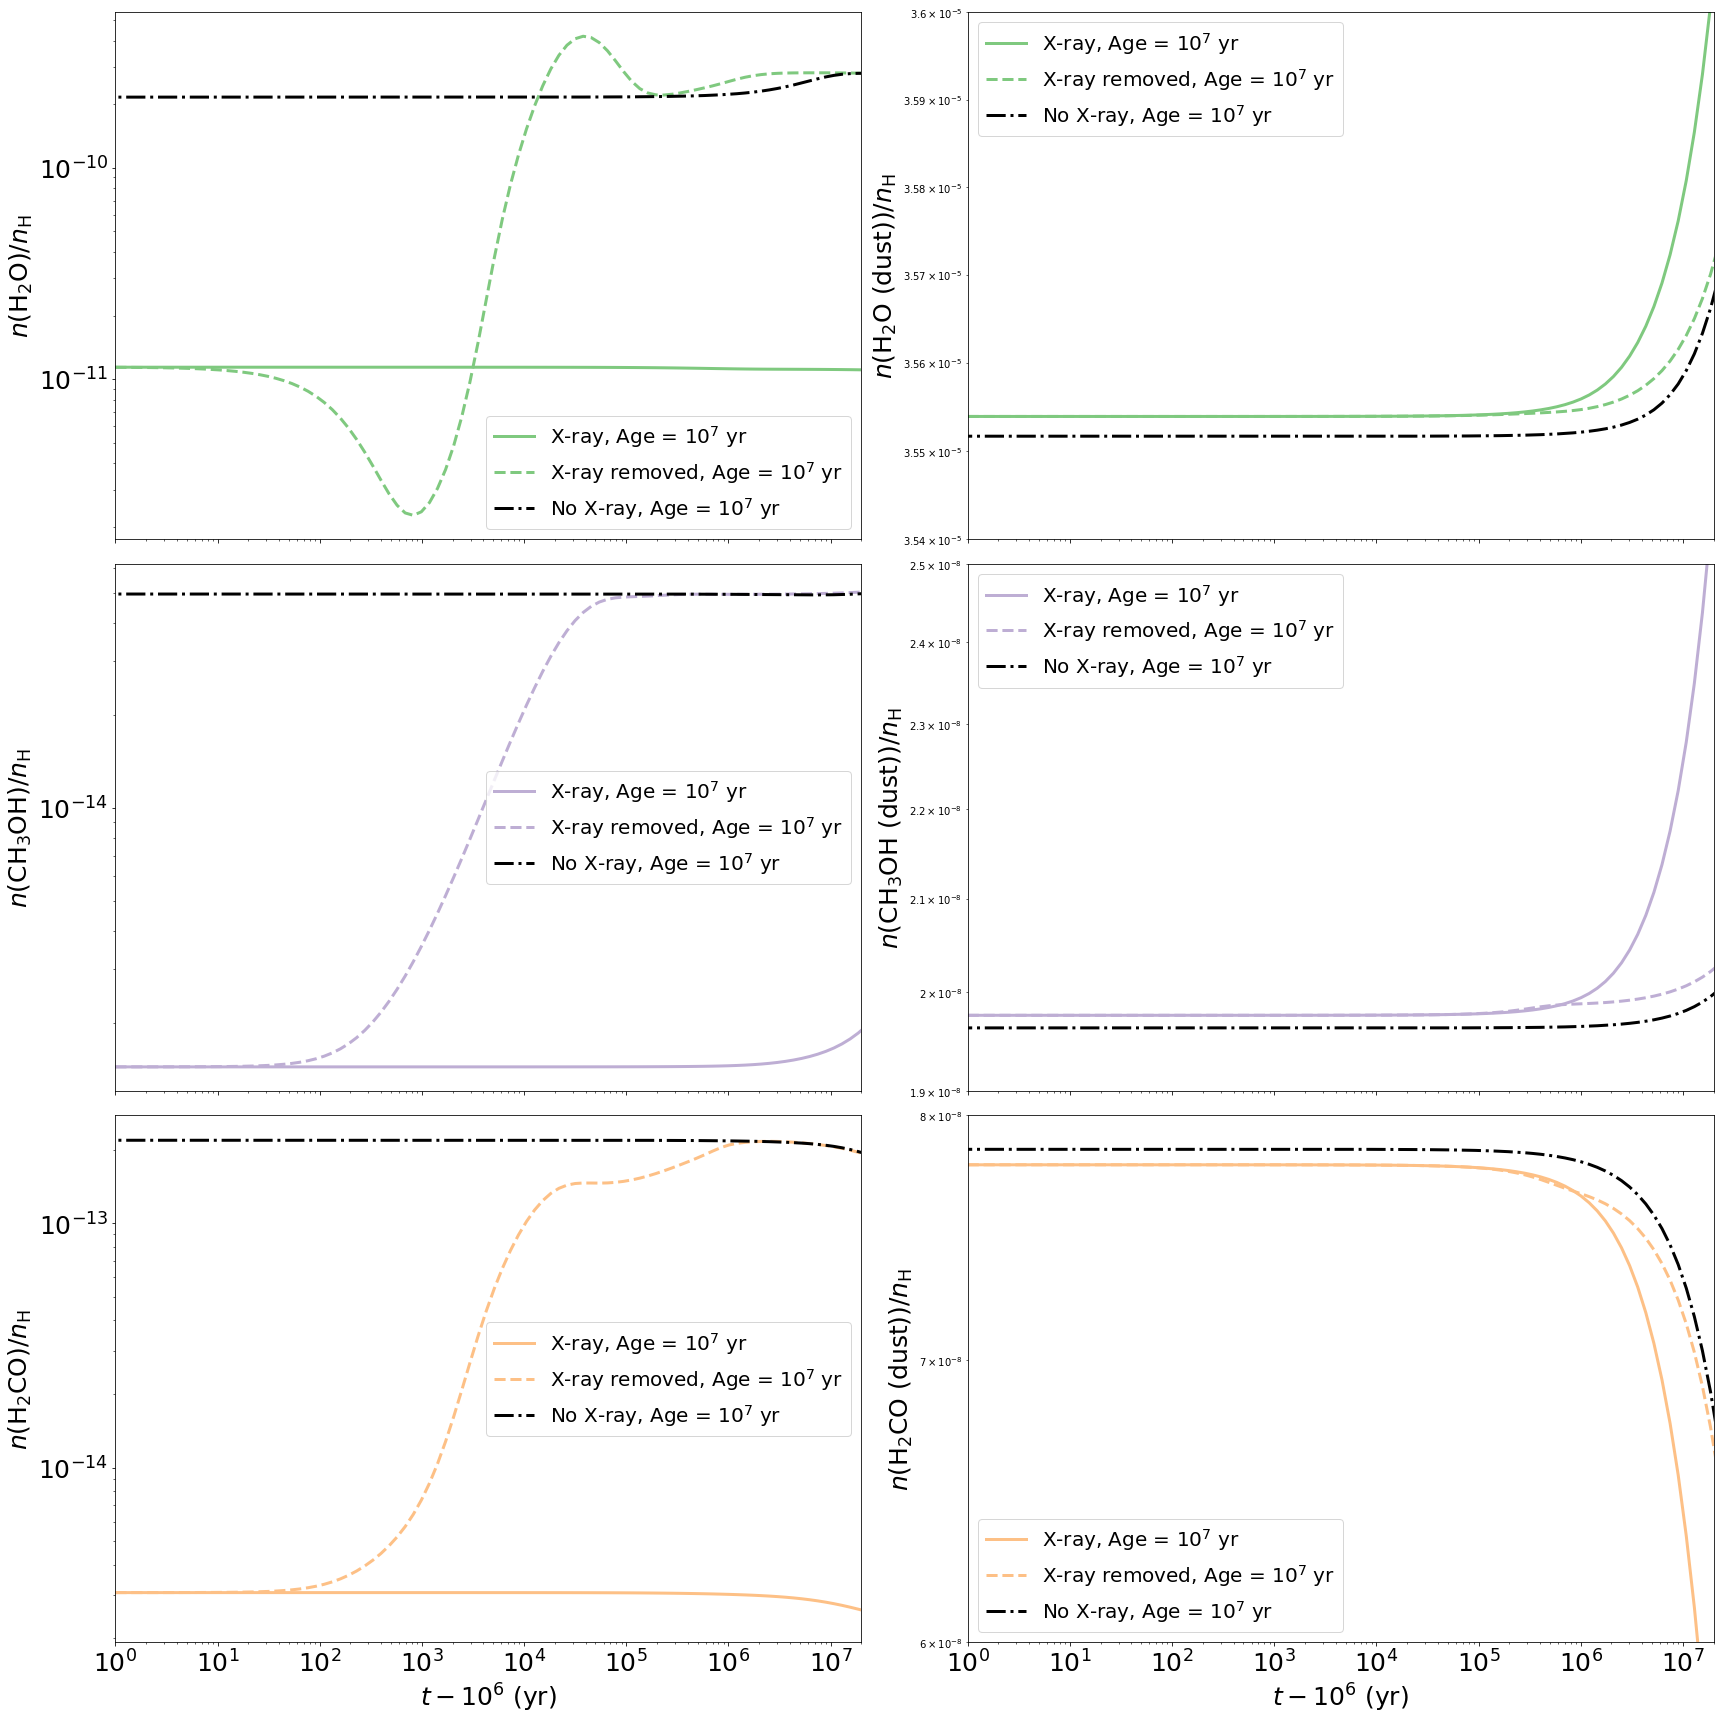

In [90]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_age('H2O', ax=ax[0], color=c_default[0])
plot_age('CH3OH', ax=ax[2], color=c_default[1])
plot_age('H2CO', ax=ax[4], color=c_default[2])

plot_age('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_default[0],
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_age('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_default[1],
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_age('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_default[2],
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[1].set_ylim([3.54e-5, 3.6e-5])
#ax[2].set_ylim([1e-18, 1e-10])
ax[3].set_ylim([1.9e-8, 2.5e-8])
ax[5].set_ylim([6e-8, 8e-8])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/age_c.eps')

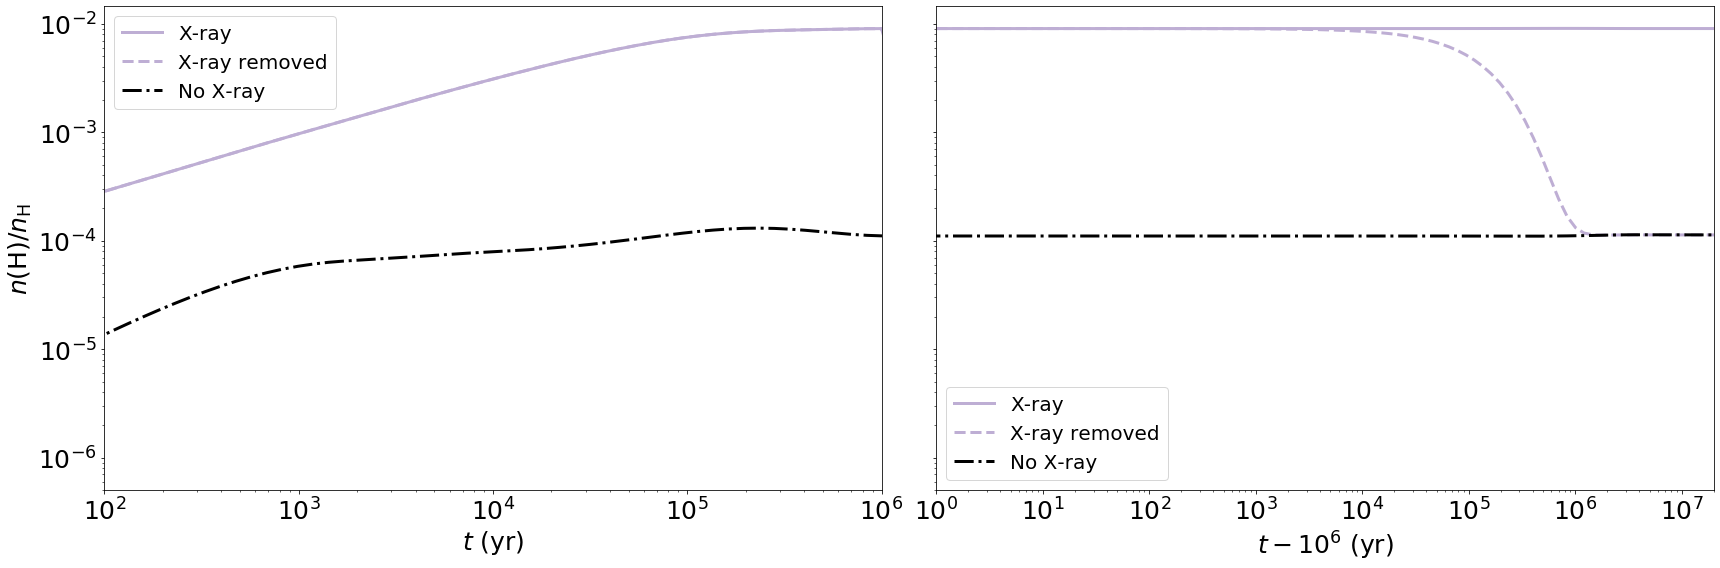

In [100]:
f, ax = plt.subplots(1, 2, figsize=(24, 8), sharex='col', sharey='row')
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H', ax=ax[0], color=c_default[1], Range=[1e2, 1e6], Dt=False)
plot_default('H', ax=ax[1], color=c_default[1])

for a in ax[1::2]:
    a.set_ylabel('')
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/otherprebiotic_c.eps')

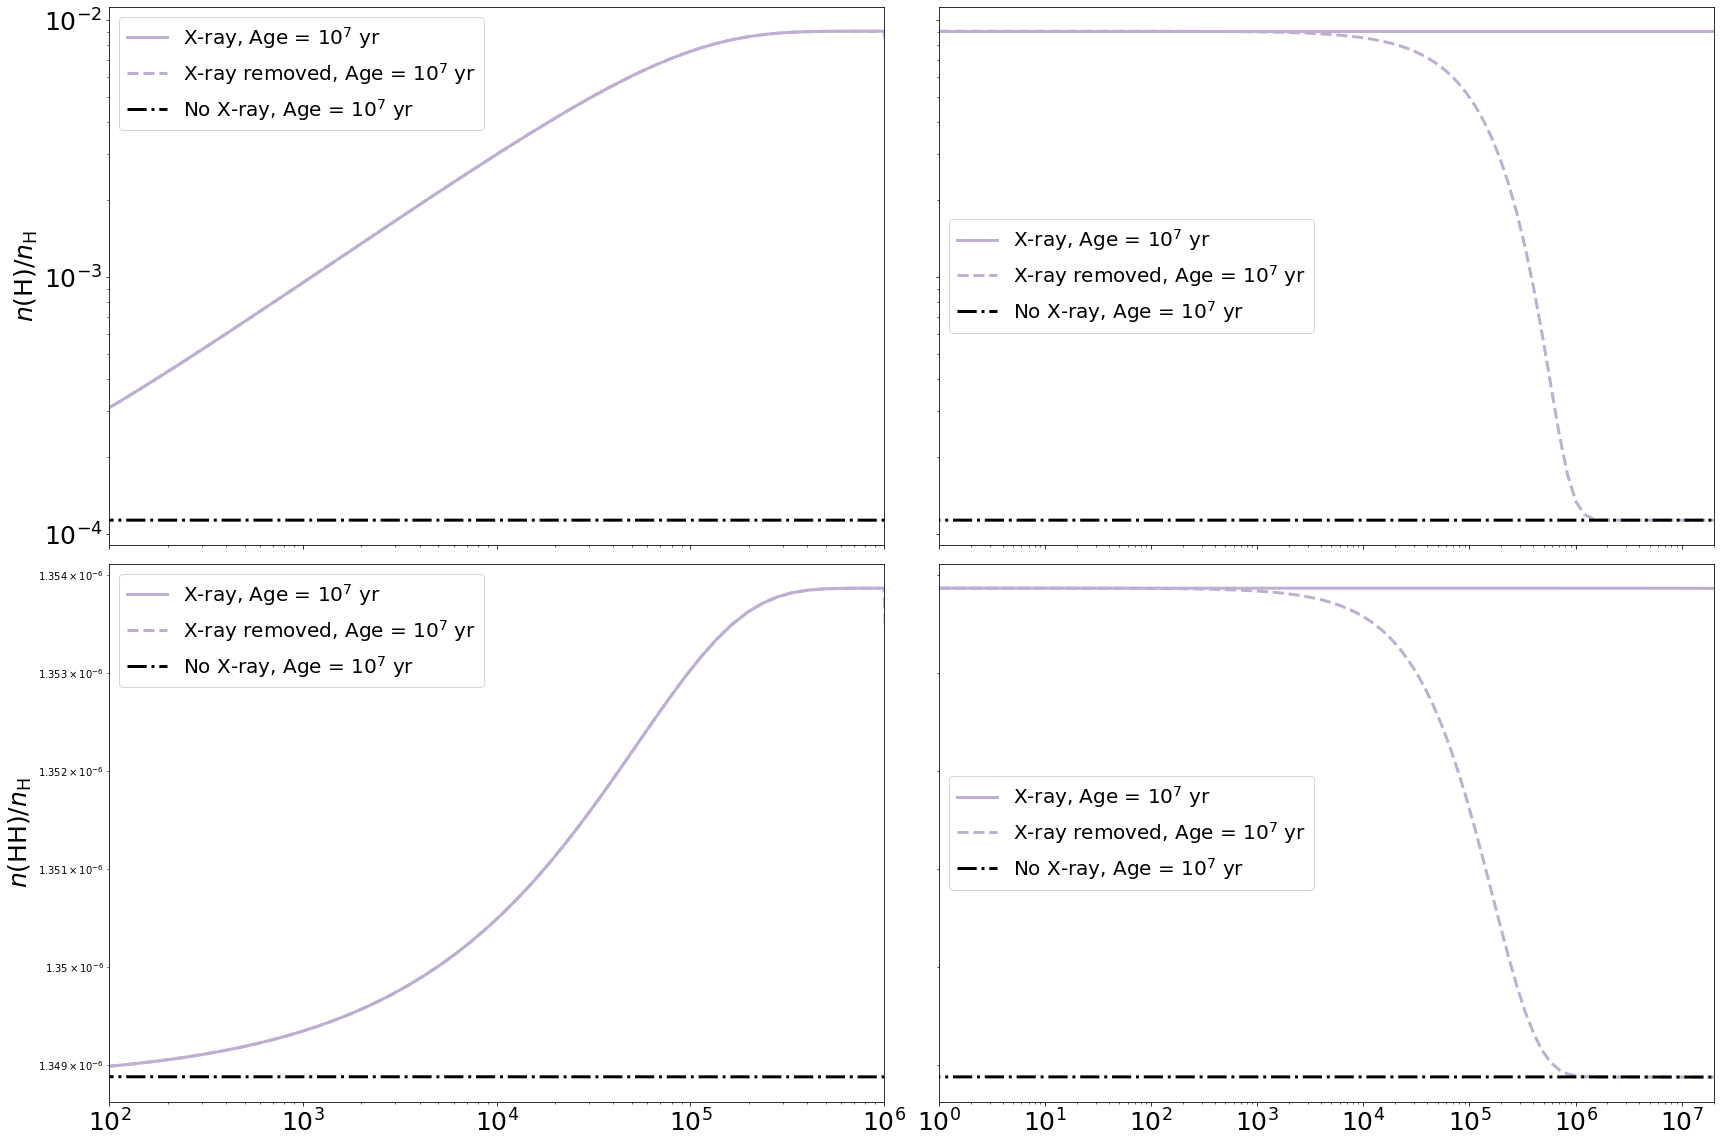

In [107]:
f, ax = plt.subplots(2, 2, figsize=(24, 16), sharex='col', sharey='row')
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_age('H', ax=ax[0], color=c_default[1], Range=[1e2, 1e6], Dt=False)
plot_age('H', ax=ax[1], color=c_default[1])

plot_age('H_DUSTH_DUST', ax=ax[2], color=c_default[1], Range=[1e2, 1e6], Dt=False)
plot_age('H_DUSTH_DUST', ax=ax[3], color=c_default[1])

for a in ax[1::2]:
    a.set_ylabel('')
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/otherprebiotic_c.eps')